# White noise

### white noise is  a special type of times-series, where data doesen't follow a pattern 

## in order to considera series as a white noise <br><br>

#### -- A constant mean
#### -- A constant variance
#### -- No autocorelation in a period (autocorelation mesaures how corelated a series is with past version of itself
### i.e ρ = corr(x,xt-1)
### No autocorelation = No clear relationship between past and present values
### White noise is a sequence of random data , where every value has time period associated with it

# <br><br><br>

# Importing relvant packages

In [1]:
pip install --upgrade --no-deps statsmodels


Requirement already up-to-date: statsmodels in c:\users\admin\appdata\local\continuum\anaconda3\lib\site-packages (0.12.1)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
#import statsmodels.tsa.stattolls as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

# Loading and transforming the data

In [3]:
data = pd.read_csv("index2018.csv")
df_comp = data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')

# removing surplus data 

In [4]:
df_comp['market_value'] = df_comp.spx

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [6]:
wn = np.random.normal() # this will create an array of random variable from a normal distribution

#### if we want this sequence to be comparable to S&P one we should set it's mean  and standrad deviation to that of the actual set
#### [x1,x2,x3,......xn]
#### X~N(\mu ,\sigma ^{2})
#### X~N(\muS&P ,\sigma ^{2}S&P)<br><br>
#### pandas provide methods mean and std which estimate these values

##### mean()
##### std(

#### loc = takes numbers for the average point of the distribution
#### scale = indicates how wide the distribution is

In [7]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size=len(df))

In [8]:
df['wn'] = wn

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1092.751599
std,292.559287,292.581395
min,438.920000,-16.669682
25%,914.620000,896.539937
50%,1144.650000,1088.594404
75%,1316.280729,1290.009539
max,1570.252238,2207.984475


##### here we can see that mean is not exactly same

### the reason is that the white noise values we generated are normally distributed around the mean of the S&P
### Since each one is generate individually the average does not have to end up being the same 

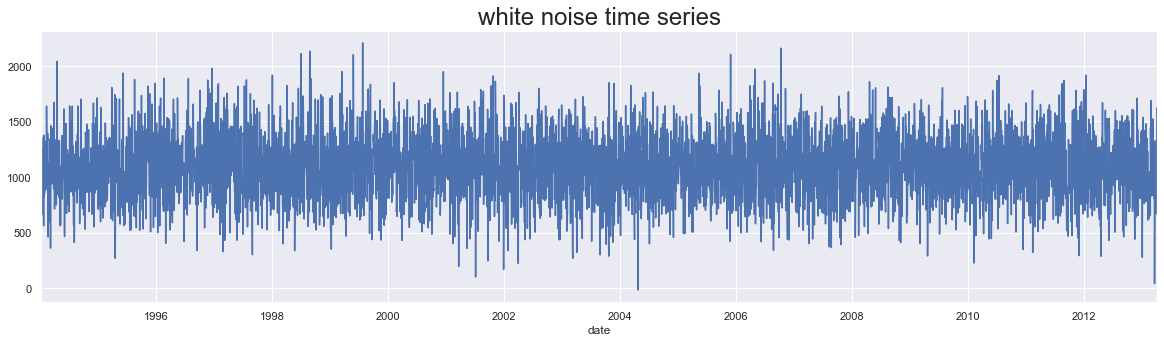

In [10]:
df.wn.plot(figsize = (20,5))
plt.title("white noise time series", size=24)
plt.show()

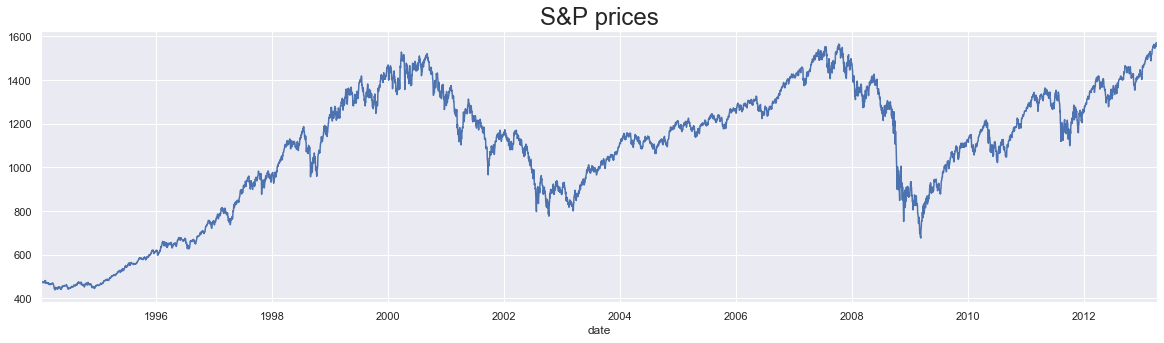

In [11]:
df.market_value.plot(figsize = (20,5))
plt.title("S&P prices", size=24)
plt.show()

### ylim = sets the limit for the y-axis 

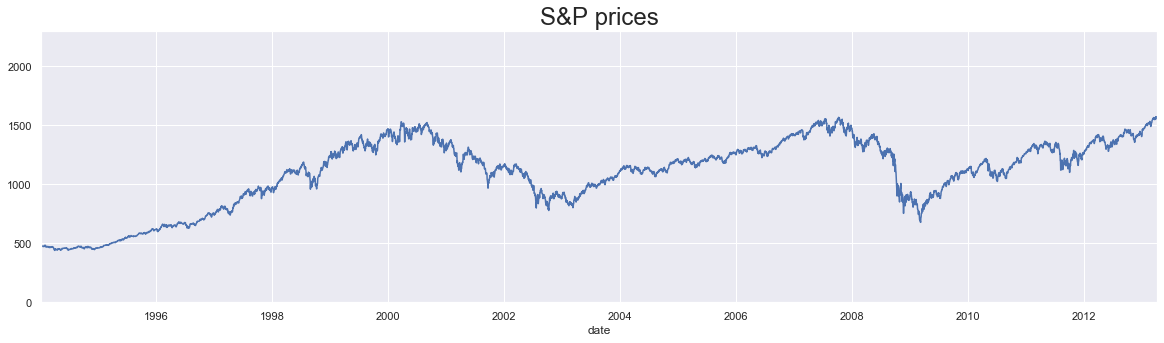

In [12]:
df.market_value.plot(figsize = (20,5))
plt.title("S&P prices", size=24)
plt.ylim(0,2300)
plt.show()

In [13]:
# there is smaller jumps betwwen periods for S&P values

#### we cannot predict white noise because the data is essentially random we cannot find the pattern that we expect to continue over time 

# *Random walk

### A Random walk is a special type of time series , where values tends to persist over a time and the difference between periods are simply white noise

### Suppose
#### Pt = time
#### εt = residuals

### Pt = pt-1 + εt

### εt ~(μ,σ2)
### residuals are white noise and they are arbitary and can not be predicted
### This suggest that the best estimate  price for today is are prices yesterday

In [14]:
rw  = pd.read_csv("randwalk.csv")

In [15]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)

In [16]:
rw.set_index("date", inplace=True)

In [17]:
rw = rw.asfreq('b')

In [18]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [19]:
df['rw'] = rw.price

C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1026.931219,1122.139662
1994-01-10,475.27,976.353735,1080.347860
1994-01-11,474.13,1358.796291,1082.095245
1994-01-12,474.17,767.345011,1083.639265
1994-01-13,472.47,664.263622,1067.146255


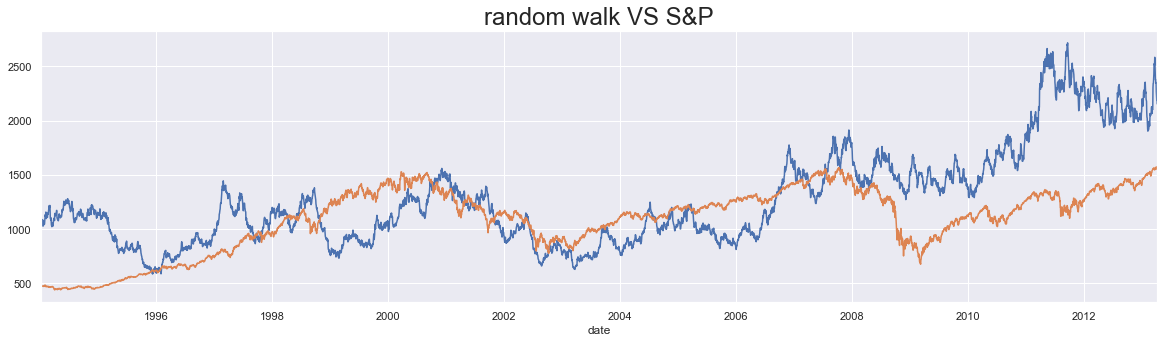

In [21]:
df.rw.plot(figsize = (20,5))
df.market_value.plot(figsize = (20,5))
plt.title('random walk VS S&P', Size = 24)
plt.show()

### Both graph has <br>
##### small variation betwwen consecutive  time periods
##### Cyclical increases and decreases in short  periods of time

## Market efficiency = it mesaures the level of difficulty in forecasting correct future valuse

## Stationary

## we classify a time series as covariance stationary as if it satisfy three key assumption 

### 1) Constant mean(μ)
### 2) Constant variance(σ2)
### 3) data to have consistant covariance between periods at an identicle distance from one other
### Cov(xn,xn+k) = Cov(Xm,xm+k)
## In other words we want to have same covariance between first and fourth period as we do for 3rd and 6th

### Cov(x1,x4) = cov(x3,x6)

## For white noise 

### μ = 0
### Constant σ2
### Cov(xn,xn+k) = Cov(Xm,xm+k)*σ1σ2 =0

### staionary means  = strict stationary

#### where identicle size would have idenicle distribution

## stationary = covariance stationary

In [22]:
import statsmodels.tsa.stattools as sts

In [23]:
import statsmodels.tsa.stattools as sts

In [24]:
sts.adfuller(df.market_value)

(-1.7369847452352427,
 0.4121645696770626,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

### on first line we see the test statistics from running the test 
### python also provide 1,5 and 10%of criticle values
### we can see that t statistics is greater than each of the critical values
### the seond line of the results express the P value associated with the t-statistics
### this indicate that 41% of chance not rejecting the null
### the 3rd line represents the number of lags used in the regression
### 4th line represents the number of observation used in the analysis
### this value depends on the number of lags used in the regression
### it estimate the maximized information criteria provided there is some apparent auto corrrelation the lower the values the easier it is to make prediction fro the future to provide

In [25]:
sts.adfuller(df.wn)

(-69.68156566149358,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70814.72297121299)

### Since we know that white noise is a stationary process so we expect to get a very low p value
### since there is no autocorrelation in white noise hence there is no lags involved in regression

In [26]:
sts.adfuller(df.rw)

(-1.3286073927689723,
 0.6159849181617383,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### there is 60% chance that data comes from  non stationary process
### we expect random walks to be non stationary process

# Seasonality

### it suggest that  certain trend will appear on cyclical basis
##### In time series data, seasonality is the presence of variations that occur at specific regular intervals less than a year, such as weekly, monthly, or quarterly. Seasonality may be caused by various factors, such as weather, vacation, and holidays[1] and consists of periodic, repetitive, and generally regular and predictable patterns in the levels[2] of a time series.

## To test the seasonality
### we decompose the sequences into three parts

## 1) pattern -- trend(The increasing or decreasing value in the series.)
## 2) Seasonal -- Cyclical effect(The repeating short-term cycle in the series.)
## 3) Residual -- error of prediction or the difference between the actual data and dat provided by model

## Simplest type of decompostion is called "NAIVE DECOMPOSITION"

#### with Naive decomposition we expect a linear relationship between 3 parts and the observed time series

## Combining Time Series Components

#### It is helpful to think of the components as combining either additively or multiplicatively.<br><br>

## Additive Model<br><br>
#### An additive model suggests that the components are added together as follows:<br>

### Observed = Trend + Seasonality + Noise(Residuals)

#### 1) An additive model is linear where changes over time are consistently made by the same amount.

#### 2) A linear trend is a straight line.

#### 3) A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).<br><br>


## Multiplicative model<br><br>

#### A multiplicative model suggests that the components are multiplied together as follows<br>

## Observed = Trend * Seasonality * Noise(Residuals

#### 1)  A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

#### 2) A nonlinear trend is a curved line.

#### 3) A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.<br><br>

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose


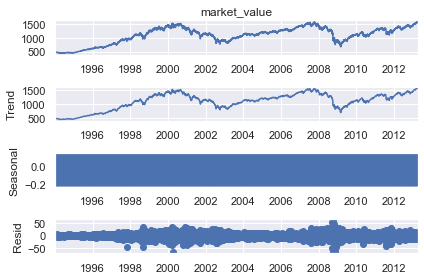

In [31]:
s_dec_additive  = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

In [32]:
#Observation by above graphs



##### Trends closely resemble the observed series
##### that's because the decompostion function uses the previous periods values as the trendsetter
##### We can see that  seasonality is like ractangle this happen because when the values are constantly oscilating back and forth and the figure size too small
##### therefore there is no concrete cyclical pattern determined by using naive deomposotion
##### The residuals are the error of our model estimate 
##### Essentially they are the difference between true values and prdeicted values 
##### residuals are high during 2000 and 2008

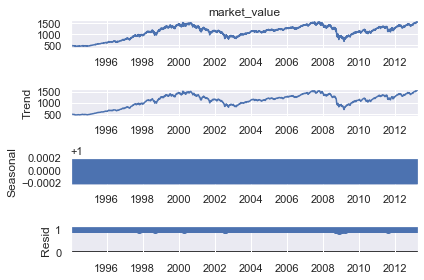

In [33]:
s_dec_multiplicative  = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

##### here we can also see that there is no seasonality among S&p prices